Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0023 - loss: 2.3589
Epoch 2/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0029 - loss: 0.5165
Epoch 3/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0027 - loss: 0.4381
Epoch 4/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0025 - loss: 0.4274
Epoch 5/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0026 - loss: 0.4179
Epoch 6/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0029 - loss: 0.4015
Epoch 7/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0028 - loss: 0.4073
Epoch 8/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0029 - loss: 0.4094
Epoch 9/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0021 - loss: 0.3830
Epoch 10/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0027 - loss: 0.3848
Epoch 11/100
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0028 - loss: 0.3775
Epoch 12/100
1652/1652 ━━━━━━━━

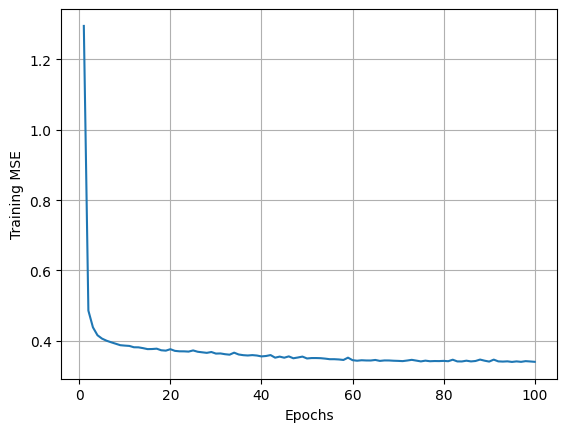

In [ ]:
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

california = datasets.fetch_california_housing();
X = california.data;
y = california.target;

#The data pertains to the houses found in a given California district
#and some summary stats about them based on the 1990 census data.
#Total number of points = 20640
#The 8 features are

#MedInc
#HouseAge
#AveRooms
#AveBedrms
#Population
#AveOccup
#Latitude
#Longitude

# The target is
#MedHouseVal

ss = StandardScaler()
X = ss.fit_transform(X)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state=5)

model = Sequential()
model.add(Dense(8,input_dim=8,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=["accuracy"])

history = model.fit(Xtrain,ytrain,epochs=100,batch_size=10,verbose=1)
ypred = model.predict(Xtest)
ypred = ypred[:,0]

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print('Test MSE =', mse)
print('Test R2 score =', r2)

import matplotlib.pyplot as plt
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.grid()
plt.show()